In [ ]:
import pandas as pd
import numpy as np

In [ ]:
! wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv

--2021-04-12 13:34:52--  https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61456 (60K) [text/plain]
Saving to: ‘kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv.5’

kirby127a_3_1_ax_28 100%[===================>]  60.02K  --.-KB/s    in 0.008s  

2021-04-12 13:34:53 (7.45 MB/s) - ‘kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv.5’ saved [61456/61456]



In [ ]:
df = pd.read_csv("kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv.5")

In [ ]:
df.head(4)

,roi,volume,type,level
0,Telencephalon_L,531111,1,1
1,Telencephalon_R,543404,1,1
2,Diencephalon_L,9683,1,1
3,Diencephalon_R,9678,1,1


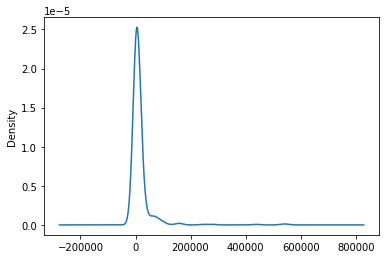

In [ ]:
df.volume.plot.density()

In [ ]:
df = df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std'],\
              axis = 1)

In [ ]:
df

,roi,volume,type,level
0,Telencephalon_L,531111,1,1
1,Telencephalon_R,543404,1,1
2,Diencephalon_L,9683,1,1
3,Diencephalon_R,9678,1,1
4,Mesencephalon,10268,1,1
...,...,...,...,...
831,Caudate_tail_L,363,2,5
832,Caudate_tail_R,345,2,5
833,Chroid_LVetc_L,444,2,5
834,Chroid_LVetc_R,371,2,5


In [ ]:
# Extract the type 1 level 1 data
t1l1 = df.loc[(df.type == 1) & (df.level == 1)] # loc is almost equivalent to filter in dplyr

# Assign a new colum for ICV
t1l1 = t1l1.assign(icv = sum(t1l1.volume))

# TBV is defined as the sum of the volume for all rows except CSF
t1l1 = t1l1.assign(tbv = sum(t1l1.volume[(t1l1.roi!='CSF')]))

# Adding another column comp which is the volume/tbv
t1l1 = t1l1.assign(comp = lambda x: x.volume/x.tbv)

In [ ]:
# just an example of using loc
df.loc[df.volume == 371]

,roi,volume,type,level
489,Chroid_LVetc_R,371,1,5
834,Chroid_LVetc_R,371,2,5


In [ ]:
t1l1

,roi,volume,type,level,icv,tbv,comp
0,Telencephalon_L,531111,1,1,1378295,1268519,0.418686
1,Telencephalon_R,543404,1,1,1378295,1268519,0.428377
2,Diencephalon_L,9683,1,1,1378295,1268519,0.007633
3,Diencephalon_R,9678,1,1,1378295,1268519,0.007629
4,Mesencephalon,10268,1,1,1378295,1268519,0.008094
5,Metencephalon,159402,1,1,1378295,1268519,0.125660
6,Myelencephalon,4973,1,1,1378295,1268519,0.003920
7,CSF,109776,1,1,1378295,1268519,0.086539


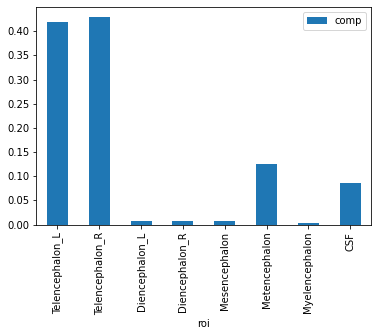

In [ ]:
t1l1.plot.bar(x = 'roi', y = 'comp')

In [ ]:
! pip install plotly==4.0.0

     |████████████████████████████████| 6.8MB 6.5MB/s 
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, but you'll have plotly 4.0.0 which is incompatible.
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import plotly.express as px
myplot = px.bar(t1l1, x = 'roi', y = 'volume')
myplot.show()